### The process of training a model can be either supervised or unsupervised. 


# Unsupervised learning?

### In unsupervised learning we train a model to solve a problem without us knowing the correct answer. In fact unsupervised learning is used to solve the problem which does not have one correct answer, but there are better or worse solutions.

### In unsupervised learning, the objective function makes its judgement purely on the model's estimate. The only data we need for unsupervised learning is of model's features.

# Supervised Learning?

### In supervised learning, we assess model's performance by computing its estimates to correct answer. It requires both: Features, that is inputs to the model. Labels: those are correct answers that we want the model to be able to produce. 

In [12]:
import pandas as pd

data = pd.read_csv('seattleWeather_1948-2017.csv', parse_dates=['date'])

data = data[[d.month == 1 for d in data.date]].copy()

data

,date,amount_of_precipitation,max_temperature,min_temperature,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25229,2017-01-27,0.00,54,37,False
25230,2017-01-28,0.00,52,37,False
25231,2017-01-29,0.03,48,37,True
25232,2017-01-30,0.02,45,40,True


/var/folders/lz/9ztyyq913n1_6xkj9g8_jlg40000gn/T/ipykernel_23909/1964876534.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


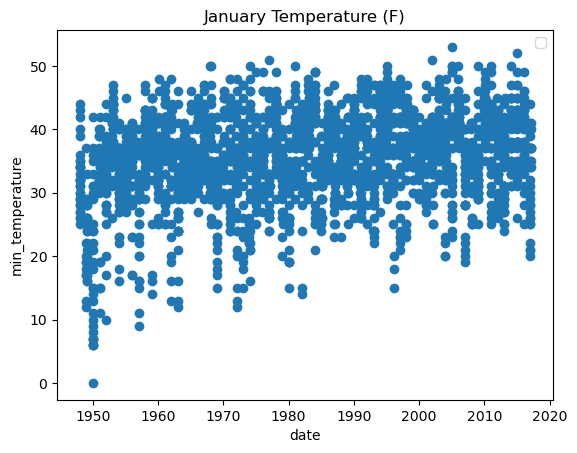

In [13]:
import matplotlib.pyplot as plt

plt.scatter(data['date'], data['min_temperature'])

plt.xlabel('date')
plt.ylabel('min_temperature')
plt.title('January Temperature (F)')
plt.legend()

/var/folders/lz/9ztyyq913n1_6xkj9g8_jlg40000gn/T/ipykernel_23909/2032443482.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


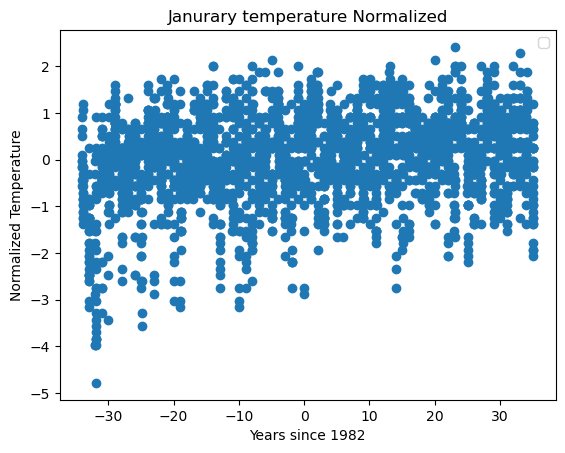

In [14]:
 import numpy as np

 data['years_since_1982'] = [(d.year + d.timetuple().tm_yday / 365.25) - 1982 for d in data.date]

 data['normalised_temperature'] = (data['min_temperature'] - np.mean(data['min_temperature'])) / np.std(data['min_temperature'])

 plt.scatter(data['years_since_1982'], data['normalised_temperature'])
 plt.xlabel('Years since 1982')
 plt.ylabel('Normalized Temperature')
 plt.title('Janurary temperature Normalized')
 plt.legend()



In [15]:
class MyModel:
    def __init__(self):
        self.slope = 0
        self.intercept = 0

    def predict(self, date):
        return date * self.slope + self.intercept

model = MyModel()

Model parameters before training : 0, 0
Model visualized before training: 


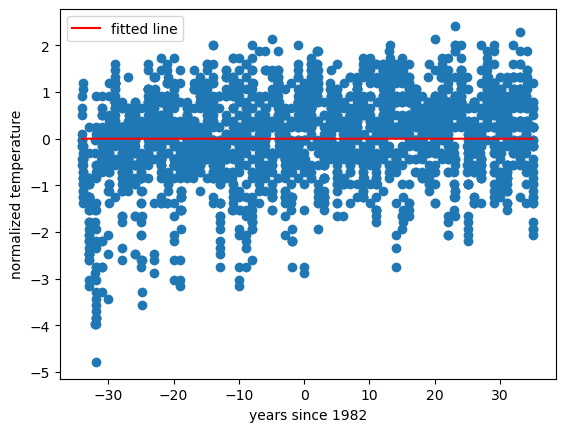

In [16]:
# Quick look into the model 
print(f'Model parameters before training : { model.intercept }, { model.slope }')

print('Model visualized before training: ')

plt.scatter(data['years_since_1982'], data['normalised_temperature'])
plt.plot(data['years_since_1982'], model.predict(data['years_since_1982']), 'r', label='fitted line')

plt.xlabel('years since 1982')
plt.ylabel('normalized temperature')
plt.legend()

In [17]:
# cost / objective function

def cost_function(actual_temp, estimated_temp):
    difference = estimated_temp - actual_temp
    cost = sum(difference ** 2)
    return difference, cost


In [20]:
# Use optimizer and train one iteration
from MyOptimizer import MyOptimizer
optimizer = MyOptimizer()

def train_one_iteration(model_inputs, true_temperatures, last_cost: float):
    estimated_temp = model.predict(model_inputs)

    difference, cost = cost_function(true_temperatures, estimated_temp)

    if cost >= last_cost:
        return False, cost
    else:
        intercept_update, slope_update = optimizer.get_parameter_updates(model_inputs, cost, difference)

        model.slope += slope_update
        model.intercept += intercept_update

        return True, cost 

In [21]:
import math

print(f"Model parameters before training:\t\t{model.intercept:.8f},\t{model.slope:.8f}")

continue_loop, cost = train_one_iteration(model_inputs = data["years_since_1982"],
                                                    true_temperatures = data["normalised_temperature"],
                                                    last_cost = math.inf)

print(f"Model parameters after 1 iteration of training:\t{model.intercept:.8f},\t{model.slope:.8f}")
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Model parameters before training:		0.00000000,	0.00000000
Model parameters after 1 iteration of training:	0.00000000,	0.01006832


Training beginning...
Iteration:  0
Iteration:  400
Iteration:  800
Iteration:  1200
Iteration:  1600
Iteration:  2000
Iteration:  2400
Iteration:  2800
Iteration:  3200
Iteration:  3600
Iteration:  4000
Iteration:  4400
Iteration:  4800
Training complete
Model parameters after training: 	-0.00648923	0.01193327


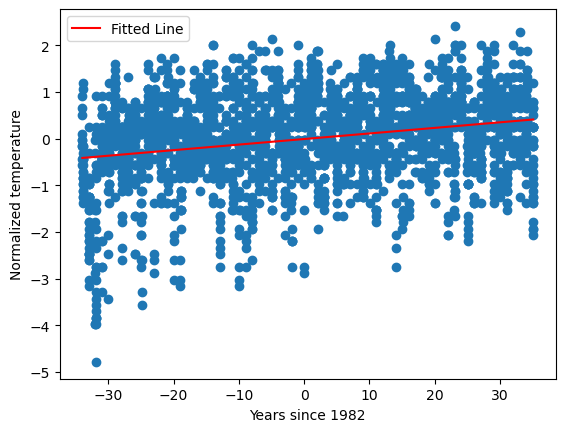

In [22]:
print('Training beginning...')

last_cost = math.inf
i = 0
continue_loop = True

while continue_loop:
    continue_loop, last_cost = train_one_iteration(model_inputs= data['years_since_1982'], true_temperatures=data['normalised_temperature'], last_cost=last_cost)

    if i % 400 == 0:
        print('Iteration: ', i)

    i += 1

print('Training complete')
print(f'Model parameters after training: \t{model.intercept:.8f}\t{model.slope:.8f}')

plt.scatter(data['years_since_1982'], data['normalised_temperature'])
plt.plot(data['years_since_1982'], model.predict(data['years_since_1982']), 'r', label = 'Fitted Line')

plt.xlabel('Years since 1982')
plt.ylabel('Normalized temperature')
plt.legend()
